# Principal Component Analysis 

## GOAL: To figure out which handwritten digits are most differentiated with PCA.

### Context
Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data.

# Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('digits.csv')

In [3]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
# Dataset is a dataframe with pixel values at positions (0,0) , (0,1).....
# Data has 64 columns of pixel data(64 features!!) and 1 column of number label.
# We have a 8x8 image of pixels with number label column identifying the handwritten digit.

In [5]:
digits.index

RangeIndex(start=0, stop=1797, step=1)

In [6]:
digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'number_label'],
      dtype='object')

In [7]:
pixels = digits.drop('number_label',axis=1)

In [8]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
# How to display pixels data as an image?
# A quick stackoverflow search provides the answer.
# 1. Collect pixel data for a single digit
# 2. It will be one-dimensional data 
# 3. Convert the data into numpy array
# 4. Reshape the data as 8*8 array
# 5. Visualize using   
#    5a. Matplotlib :  plt.imshow(array)
#    5b. Seaborn    :  sns.heatmap

### Displaying an Image

In [10]:
# Grabbing first row of data representing image for digit 0
pixels.iloc[0]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [11]:
np.array(pixels.iloc[0])

# Another way
# single_image = pixels.iloc[0]
# single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
np.array(pixels.iloc[0]).shape

(64,)

In [13]:
np.array(pixels.iloc[0]).reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

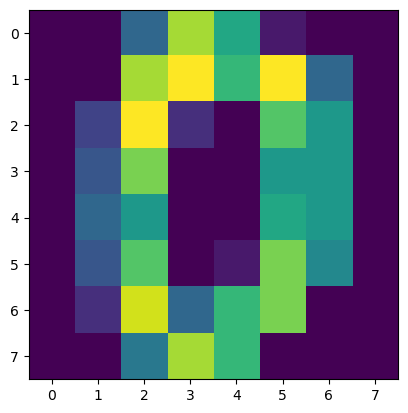

In [14]:
plt.imshow(np.array(pixels.iloc[0]).reshape((8,8)))

In [15]:
# The image is a representation of different values and not different color.
# For colored images, we need a 3D image.

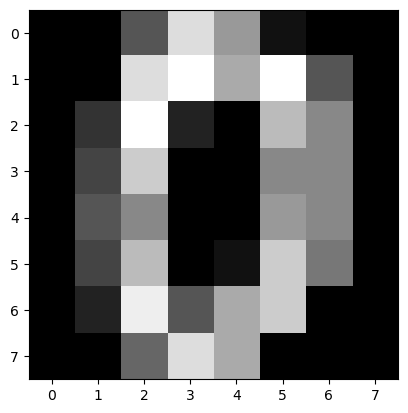

In [16]:
plt.imshow(np.array(pixels.iloc[0]).reshape((8,8)),cmap='gray')

<Axes: >

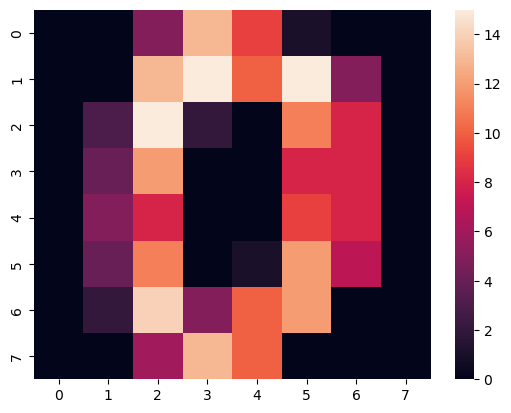

In [17]:
sns.heatmap(np.array(pixels.iloc[0]).reshape((8,8)))

<Axes: >

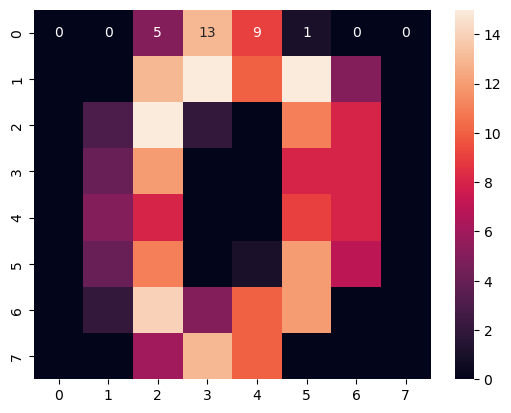

In [18]:
sns.heatmap(np.array(pixels.iloc[0]).reshape((8,8)),annot=True)

------

Now let's move on to PCA.

## Scaling Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_pixels = scaler.fit_transform(pixels)

In [22]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
# From 64 features dataset down to 2 principal components.
pca_model = PCA(n_components=2)

In [25]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [26]:
# How much variance is explained by 2 principal components.

In [27]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970436413072

In [28]:
# Creating a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset

In [29]:
pca_pixels

array([[ 1.91423253, -0.95439257],
       [ 0.58895587,  0.92448546],
       [ 1.30208183, -0.31700834],
       ...,
       [ 1.02257159, -0.14805597],
       [ 1.07602899, -0.38106294],
       [-1.25772929, -2.22772174]])

In [30]:
# pca_pixels is a numpy array with first column for first principal component and second column for second principal component.

In [31]:
pca_pixels[:,0]

# Grabbing all rows of first column
# Gives first principal component

array([ 1.91423253,  0.58895587,  1.30208183, ...,  1.02257159,
        1.07602899, -1.25772929])

In [32]:
# Similarly for second principal component
pca_pixels[:,1]

array([-0.95439257,  0.92448546, -0.31700834, ..., -0.14805597,
       -0.38106294, -2.22772174])

<Axes: >

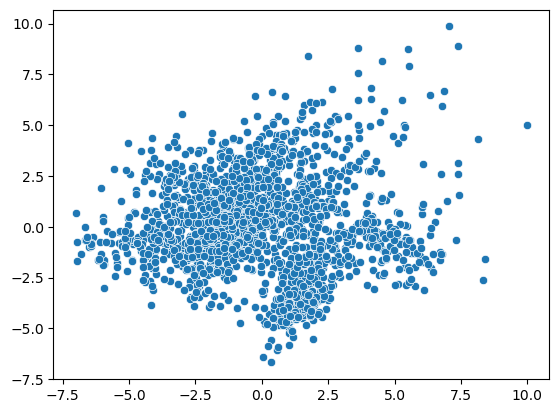

In [33]:
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1])
#,hue=digits['number_label']

In [34]:
digits['number_label'].values

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

<Axes: >

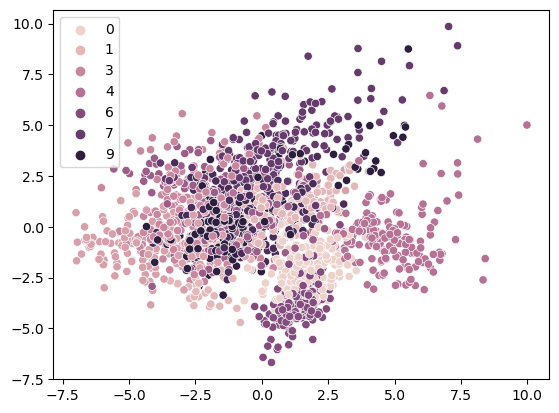

In [35]:
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=digits['number_label'].values)

In [36]:
# Currently seaborn is displaying it on continous color mapping

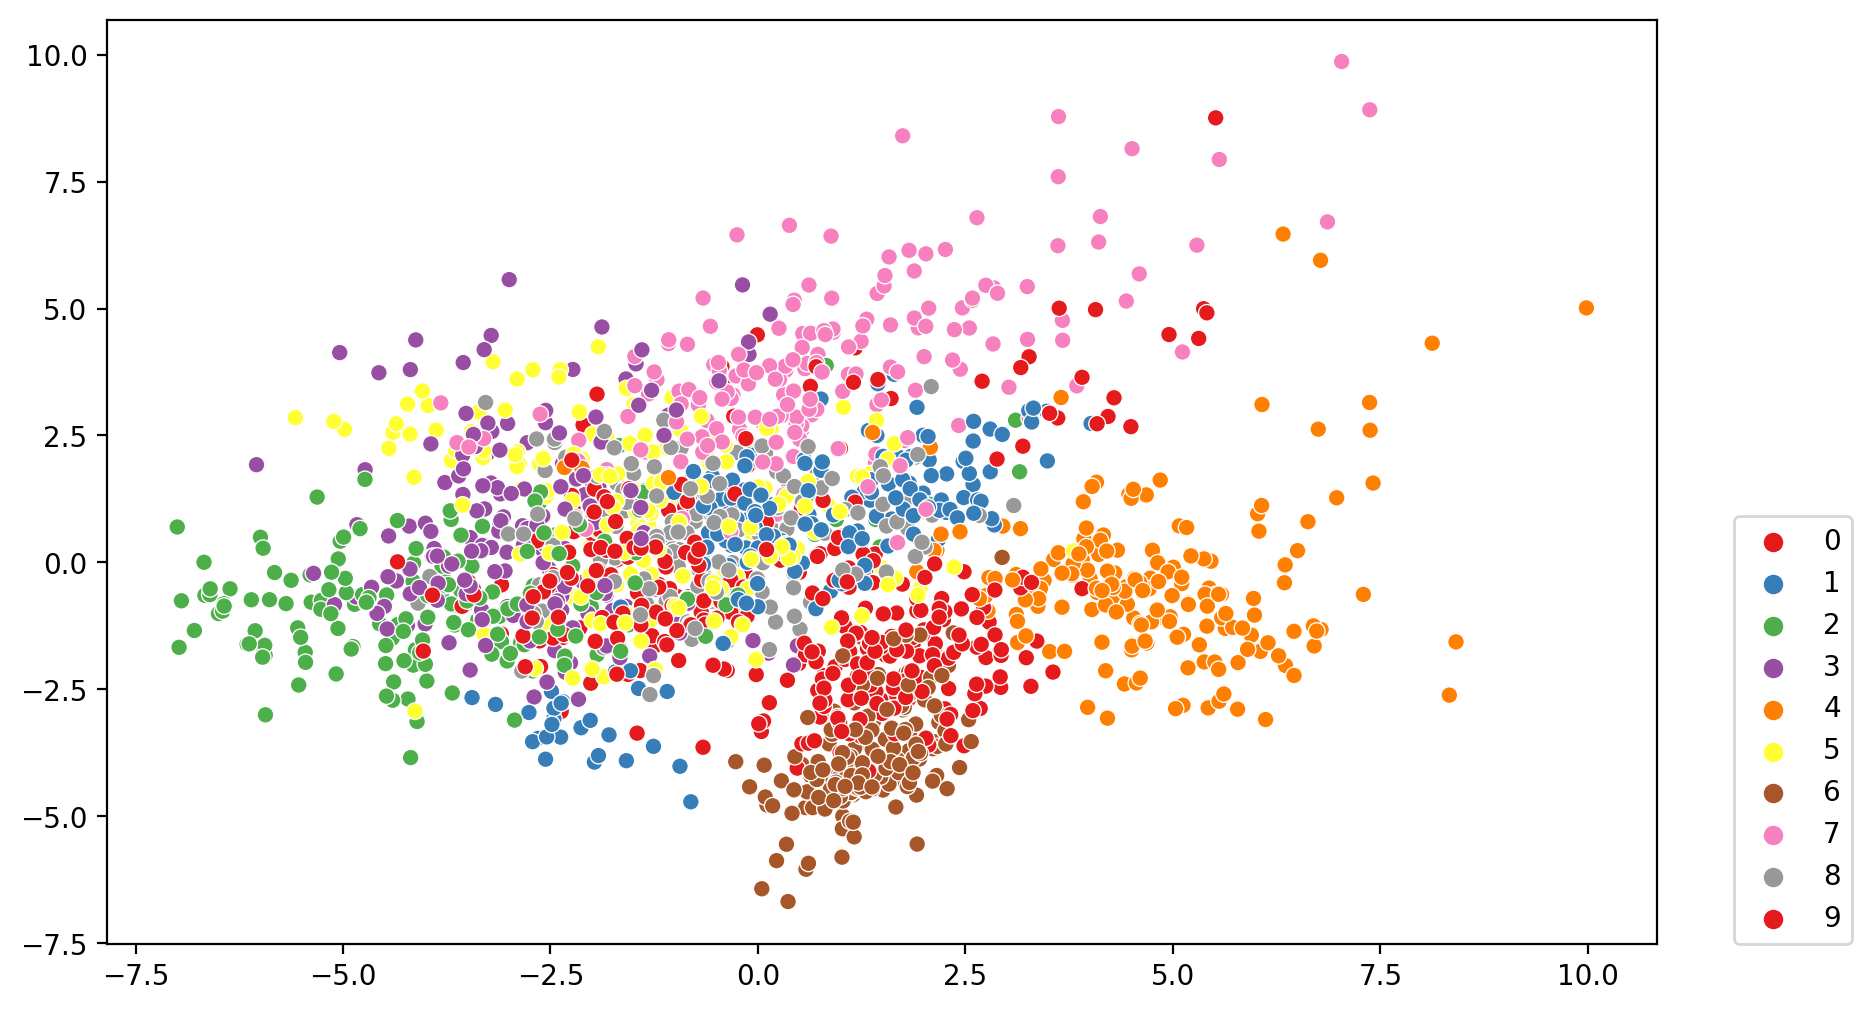

In [37]:
plt.figure(figsize=(10,6),dpi=200)

sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=digits['number_label'].values,palette='Set1')

plt.legend(loc=(1.05,0))

**Which numbers are the most "distinct"?**

In [38]:
# It can be observed that label #4 is the most separated group, 
# implying its the most distinct, similar situation for #2, #6 and #9.

In [39]:
# We want to look at clusters that are further separated from the ones that are right on top of each other
# The cluster representing number 4(orange),6(brown),2(green),7(pink) are pretty separated from each other (easily differentiable).
# There is no need to collect more data for these digits
# The numbers which are unique or differentiated will be easy for an ML algorithm to recognize.

# Rest are on top of each other. Even by reducing them to their principal components, they are hard to differentiate.
# There is need to gather more data for numbers that overlap.

-----------
---------
Creating an 'interactive' 3D plot of the result of PCA with 3 principal components. 

In [40]:
pca_model = PCA(n_components=3)

In [41]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [42]:
from mpl_toolkits import mplot3d

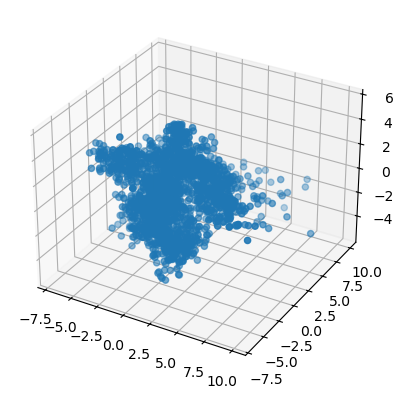

In [43]:
# Refer Stacoverflow
# 

ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2])

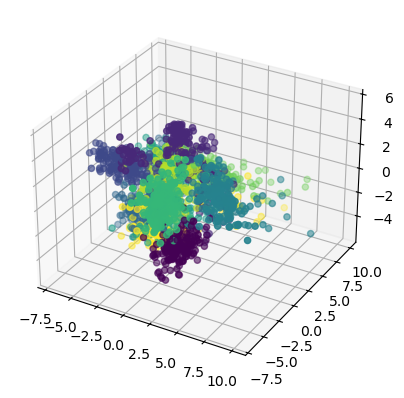

In [44]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

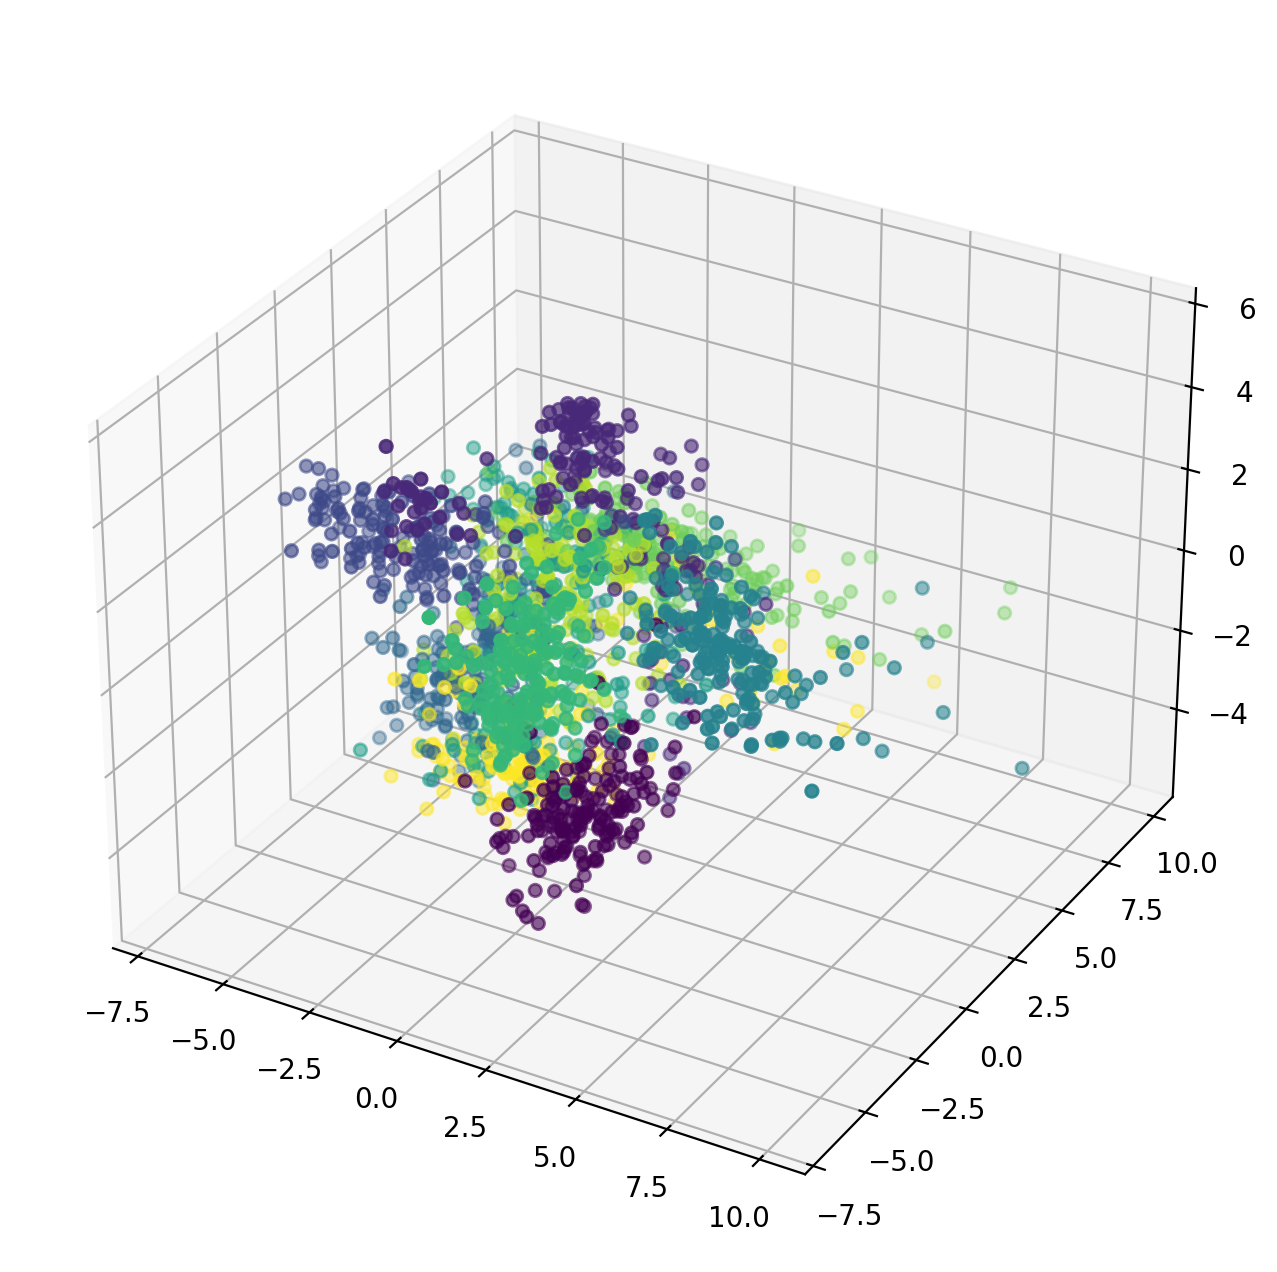

In [45]:
plt.figure(figsize=(8,8),dpi=200)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);

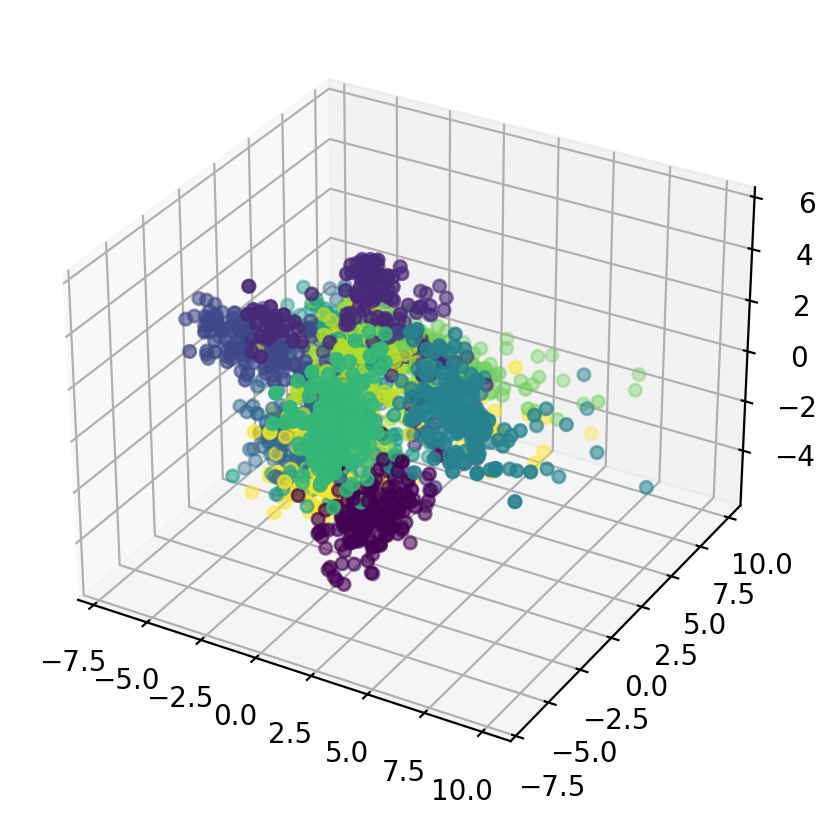

In [46]:
 %matplotlib inline
# Above command will make all images interactive

plt.figure(figsize=(5,5),dpi=200)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);